In [5]:
!pip -qqq install pip --progress-bar off
!pip -qqq install 'crewai[tools]'==0.28.8 --progress-bar off
!pip -qqq install langchain-groq==0.1.3 --progress-bar off
!pip -qqq install duckduckgo-search==5.3.0 --progress-bar off
!pip install exa-py
!pip install numpy==1.26.0 pandas --progress-bar off

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
xarray 2025.9.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
gradio 5.46.0 requires typer<1.0,>=0.12, but you have typer 0.9.4 which is incompatible.
bigframes 2.21.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.30.0 which is inc

In [1]:
from exa_py import Exa
import requests
import pandas as pd
import os

os.environ["GROQ_API_KEY"] = input("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")

gsk_dE4FjFrKvzIzejB0RxxKWGdyb3FYAjDfLzgbhSyyYHj9UIzAXS8agsk_dE4FjFrKvzIzejB0RxxKWGdyb3FYAjDfLzgbhSyyYHj9UIzAXS8a


Title: Bitcoin - Wikipedia
URL: https://en.wikipedia.org/wiki/Bitcoin
ID: https://en.wikipedia.org/wiki/Bitcoin
Published Date: 2025-04-30T13:19:13.000Z
Author: Contributors to Wikimedia projects
Image: https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Bitcoin.svg/640px-Bitcoin.svg.png
Favicon: None
Summary: Bitcoin (BTC, ₿) is the first decentralized cryptocurrency. It was created in 2008 by Satoshi Nakamoto and is based on a free-market ideology.


Title: Making sense of bitcoin, cryptocurrency and blockchain - PwC
URL: https://www.pwc.com/us/en/industries/financial-services/fintech/bitcoin-blockchain-cryptocurrency.html
ID: https://www.pwc.com/us/en/industries/financial-services/fintech/bitcoin-blockchain-cryptocurrency.html
Published Date: 2024-04-11T22:23:00.000Z
Author: PricewaterhouseCoopers
Image: https://www.pwc.com/us/en/industries/financial-services/images/bitcoin-blockchain-cryptocurrency-properties.jpeg
Favicon: https://www.pwc.com/etc.clientlibs/pwc/clientlibs/css
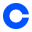

In [2]:
# Initialize Exa API
exa = Exa(api_key="16058df8-d8fc-4c98-9157-be495ebe9f44")

def get_cryptocurrency_news(query):
    result = exa.search_and_contents(query, summary=True)

    # Ensure results exist before iterating
    if result.results:
        news_list = []
        for item in result.results:
            # Extracting attributes directly from the Result object
            news_item = {
                "title": item.title if hasattr(item, "title") else "No Title",
                "url": item.url if hasattr(item, "url") else "#",  # URL and ID are the same
                "id": item.id if hasattr(item, "id") else "#",  # ID is same as URL
                "score": item.score if hasattr(item, "score") else "No Score",
                "published_date": item.published_date if hasattr(item, "published_date") else "Unknown Date",
                "author": item.author if hasattr(item, "author") else "Unknown Author",
                "image": item.image if hasattr(item, "image") else "No Image",
                "favicon": item.favicon if hasattr(item, "favicon") else "No Favicon",
                "summary": item.summary if hasattr(item, "summary") else "No Summary",
                "highlights": item.highlights if hasattr(item, "highlights") else "No Highlights",
                "highlight_scores": item.highlight_scores if hasattr(item, "highlight_scores") else "No Highlight Scores",
            }
            news_list.append(news_item)

        return news_list
    else:
        return []  # Return empty list if no results found


# Fetch and display news
news = get_cryptocurrency_news("Bitcoin cryptocurrency")
for article in news[:5]:  # Display top 5 articles
    print(f"Title: {article['title']}\nURL: {article['url']}\nID: {article['id']}\nPublished Date: {article['published_date']}\nAuthor: {article['author']}\nImage: {article['image']}\nFavicon: {article['favicon']}\nSummary: {article['summary']}\n")



In [3]:
def get_daily_closing_prices(ticker) -> pd.DataFrame:
    api_key = "V8BGDDP423MZD7BJ"
    url = f"https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={ticker}&market=USD&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    price_data = data["Time Series (Digital Currency Daily)"]
    daily_close_prices = {
        date: prices["4. close"] for (date, prices) in price_data.items()
    }

    df = pd.DataFrame.from_dict(daily_close_prices, orient="index", columns=["price"])
    df.index = pd.to_datetime(df.index)
    df["price"] = pd.to_numeric(df["price"])

    return df

def format_prices(price_df: pd.DataFrame) -> str:
    """Format the daily closing prices."""
    text_output = [
        f"{date.strftime('%Y-%m-%d')} - {row['price']:.2f}"
        for date, row in price_df.head(10).iterrows()
    ]
    return "\n".join(text_output)

# Fetch and format Bitcoin price data
price_df = get_daily_closing_prices("BTC")
formatted_prices = format_prices(price_df)
print("\nBitcoin Daily Closing Prices:\n", formatted_prices)


Bitcoin Daily Closing Prices:
 2025-09-24 - 112293.99
2025-09-23 - 112017.21
2025-09-22 - 112736.59
2025-09-21 - 115282.27
2025-09-20 - 115752.40
2025-09-19 - 115690.55
2025-09-18 - 117117.99
2025-09-17 - 116484.40
2025-09-16 - 116832.56
2025-09-15 - 115381.08


#Tools

In [4]:
from crewai_tools import tool
from langchain.agents import load_tools

In [5]:
human_tools = load_tools(["human"])

In [6]:
@tool("search_tool")
def search_tool(query: str) -> str:
    """Search for the latest news and provide a summary about a given query using Exa."""
    # Perform the search and fetch the results
    result = exa.search_and_contents(query, summary=True)

    # Ensure results exist before processing
    if result.results:
        news_list = []
        for item in result.results:
            # Extracting attributes directly from the Result object
            news_item = {
                "title": item.title if hasattr(item, "title") else "No Title",
                "url": item.url if hasattr(item, "url") else "#",  # URL and ID are the same
                "id": item.id if hasattr(item, "id") else "#",  # ID is same as URL
                "score": item.score if hasattr(item, "score") else "No Score",
                "published_date": item.published_date if hasattr(item, "published_date") else "Unknown Date",
                "author": item.author if hasattr(item, "author") else "Unknown Author",
                "image": item.image if hasattr(item, "image") else "No Image",
                "favicon": item.favicon if hasattr(item, "favicon") else "No Favicon",
                "summary": item.summary if hasattr(item, "summary") else "No Summary",
                "highlights": item.highlights if hasattr(item, "highlights") else "No Highlights",
                "highlight_scores": item.highlight_scores if hasattr(item, "highlight_scores") else "No Highlight Scores",
            }
            news_list.append(news_item)

        # Format the news items into a readable string
        output = []
        for news_item in news_list:
            output.append(f"Title: {news_item['title']}\nURL: {news_item['url']}\nSummary: {news_item['summary']}\n")

        return "\n".join(output)
    else:
        return "No results found."

In [7]:
@tool("price tool")
def cryptocurrency_price_tool(ticker_symbol: str) -> str:
    """Get daily closing price for a given cryptocurrency ticker symbol for the previous 60 days"""
    price_df = get_daily_closing_prices(ticker_symbol)
    text_output = []
    for date, row in price_df.head(60).iterrows():
        text_output.append(f"{date.strftime('%Y-%m-%d')} - {row['price']:.2f}")
    return "\n".join(text_output)


In [8]:
@tool("search tool")
def cryptocurrency_news_tool(ticker_symbol: str) -> str:
    """Get news for a given cryptocurrency ticker symbol"""
    return search_tool.run(ticker_symbol + " cryptocurrency")

#Llama 3 with Groq

In [9]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

In [13]:
# Llama 3 with Groq for inference
llm = ChatGroq(temperature=0, model_name="llama-3.1-8b-instant")

system_message = "You are an experienced Machine Learning & AI Engineer."
human_message = "How to increase inference speed for a 7B LLM?"
prompt = ChatPromptTemplate.from_messages([("system", system_message), ("human", human_message)])

chain = prompt | llm
response = chain.invoke({"text": human_message})

print("\nLLM Response:\n", response.content)


LLM Response:
 Increasing inference speed for a 7B Large Language Model (LLM) involves several techniques that can be applied at different levels of the model architecture, hardware, and software. Here are some strategies to improve inference speed:

**Model-level optimizations**

1. **Knowledge Distillation**: Train a smaller student model to mimic the behavior of the larger teacher model. This can reduce the model size and improve inference speed.
2. **Pruning**: Remove unnecessary weights and connections from the model to reduce its size and computational requirements.
3. **Quantization**: Reduce the precision of model weights and activations from 32-bit floating-point to 8-bit or 16-bit integers, which can speed up computations.
4. **Model parallelism**: Split the model into smaller parts and process them in parallel on multiple GPUs or TPUs.

**Hardware-level optimizations**

1. **GPU/TPU acceleration**: Use specialized hardware like NVIDIA GPUs or Google TPUs, which are designed

#Agents

In [14]:
from crewai import Agent, Crew, Process, Task

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:918: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `CrewAgentExecutor` to V2.
  warn(


In [15]:
customer_communicator = Agent(
    role="Senior cryptocurrency customer communicator",
    goal="Find which cryptocurrency the customer is interested in",
    backstory="""You're highly experienced in communicating about cryptocurrencies
    and blockchain technology with customers and their research needs""",
    verbose=True,
    allow_delegation=False,
    llm=llm,
    max_iter=5,
    memory=True,
    tools=human_tools,
)


In [16]:
news_analyst = Agent(
    role="Cryptocurrency News Analyst",
    goal="""Get news for a given cryptocurrency. Write 1 paragraph analysis of
    the market and make prediction - up, down or neutral.""",
    backstory="""You're an expert analyst of trends based on cryptocurrency news.
    You have a complete understanding of macroeconomic factors, but you specialize
    into analyzing news.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm,
    max_iter=5,
    memory=True,
    tools=[cryptocurrency_news_tool],
)

In [17]:
price_analyst = Agent(
    role="Cryptocurrency Price Analyst",
    goal="""Get historical prices for a given cryptocurrency. Write 1 paragraph analysis of
    the market and make prediction - up, down or neutral.""",
    backstory="""You're an expert analyst of trends based on cryptocurrency
    historical prices. You have a complete understanding of macroeconomic factors,
    but you specialize into technical analys based on historical prices.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm,
    max_iter=5,
    memory=True,
    tools=[cryptocurrency_price_tool],
)

In [18]:
writer = Agent(
    role="Cryptocurrency Report Writer",
    goal="""Write 1 paragraph report of the cryptocurrency market.""",
    backstory="""
    You're widely accepted as the best cryptocurrency analyst that
    understands the market and have tracked every asset for more than 10 years. Your trends
    analysis are always extremely accurate.

    You're also master level analyst in the traditional markets and have deep understanding
    of human psychology. You understand macro factors and combine those multiple
    theories - e.g. cycle theory. You're able to hold multiple opininons when analysing anything.

    You understand news and historical prices, but you look at those with a
    healthy dose of skepticism. You also consider the source of news articles.

    Your most well developed talent is providing clear and concise summarization
    that explains very complex market topics in simple to understand terms.

    Some of your writing techniques include:

    - Creating a bullet list (executive summary) of the most importannt points
    - Distill complex analyses to their most important parts

    You writing transforms even dry and most technical texts into
    a pleasant and interesting read.""",
    llm=llm,
    verbose=True,
    max_iter=5,
    memory=True,
    allow_delegation=False,
)


#Tasks

In [19]:
get_cryptocurrency = Task(
    description=f"Ask which cryptocurrency the customer is interested in.",
    expected_output="""Cryptocurrency symbol that the human wants you to research e.g. BTC.""",
    agent=customer_communicator,
)

In [20]:
from datetime import datetime

get_news_analysis = Task(
    description=f"""
    Use the search tool to get news for the cryptocurrency

    The current date is {datetime.now()}.

    Compose the results into a helpful report""",
    expected_output="""Create 1 paragraph report for the cryptocurrency,
    along with a prediction for the future trend
    """,
    agent=news_analyst,
    context=[get_cryptocurrency],
)

In [21]:
get_price_analysis = Task(
    description=f"""
    Use the price tool to get historical prices

    The current date is {datetime.now()}.

    Compose the results into a helpful report""",
    expected_output="""Create 1 paragraph summary for the cryptocurrency,
    along with a prediction for the future trend
    """,
    agent=price_analyst,
    context=[get_cryptocurrency],
)

In [22]:
write_report = Task(
    description=f"""Use the reports from the news analyst and the price analyst to
    create a report that summarizes the cryptocurrency""",
    expected_output="""1 paragraph report that summarizes the market and
    predicts the future prices (trend) for the cryptocurrency""",
    agent=writer,
    context=[get_news_analysis, get_price_analysis],
)

#Crew

In [23]:
crew = Crew(
    agents=[customer_communicator, price_analyst, news_analyst, writer],
    tasks=[get_cryptocurrency, get_news_analysis, get_price_analysis, write_report],
    verbose=2,
    process=Process.sequential,
    full_output=True,
    share_crew=False,
    manager_llm=llm,
    max_iter=15,
)

In [24]:
results = crew.kickoff()

 [DEBUG]: == Working Agent: Senior cryptocurrency customer communicator
 [INFO]: == Starting Task: Ask which cryptocurrency the customer is interested in.


> Entering new CrewAgentExecutor chain...
Thought: I need to start by asking the customer which cryptocurrency they are interested in.

Action: John
Action Input: {"question": "Which cryptocurrency are you interested in?"} 

Action 'John' don't exist, these are the only available Actions: human: You can ask a human for guidance when you think you got stuck or you are not sure what to do next. The input should be a question for the human.

Thought: I need to start by asking the customer which cryptocurrency they are interested in.

Action: human
Action Input: {"question": "Which cryptocurrency are you interested in?"}

Which cryptocurrency are you interested in?
bitcoin
 

bitcoin

Thought: The customer has responded with "bitcoin", but I need to confirm if they are referring to the cryptocurrency or the company.

Action: human
Acti